In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-feedback-dataset/sentiment-analysis.csv
/kaggle/input/cleaned/sentiment-analysis.csv
/kaggle/input/clean/sentiment-analysis.csv


In [2]:
customer = pd.read_csv("/kaggle/input/customer-feedback-dataset/sentiment-analysis.csv")
customer

,"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"
0,"""I love this product!"", Positive, Twitter, 202..."
1,"""The service was terrible."", Negative, Yelp Re..."
2,"""This movie is amazing!"", Positive, IMDb, 2023..."
3,"""I'm so disappointed with their customer suppo..."
4,"""Just had the best meal of my life!"", Positive..."
...,...
93,"""I can't stop listening to this song. It's my ..."
94,"""Their website is so confusing and poorly desi..."
95,"""I had an incredible experience at the theme p..."
96,NaN


In [3]:
customer = pd.read_csv("/kaggle/input/cleaned/sentiment-analysis.csv")
customer

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,I love this product!,Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,The service was terrible.,Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,This movie is amazing!,Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,I'm so disappointed with their customer support.,Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,Just had the best meal of my life!,Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88
...,...,...,...,...,...,...,...
91,Just had the most amazing vacation! I can't wa...,Positive,TripAdvisor,2023-07-02 18:01:23,travelenthusiast1,Sydney,0.93
92,The food at this restaurant was awful. Never g...,Negative,Zomato,2023-07-02 20:45:37,foodlover123,Mumbai,0.55
93,I can't stop listening to this song. It's my n...,Positive,Spotify,2023-07-03 09:17:52,musiclover789,Berlin,0.91
94,Their website is so confusing and poorly desig...,Negative,Website Review,2023-07-03 11:59:18,user789,Toronto,0.68


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

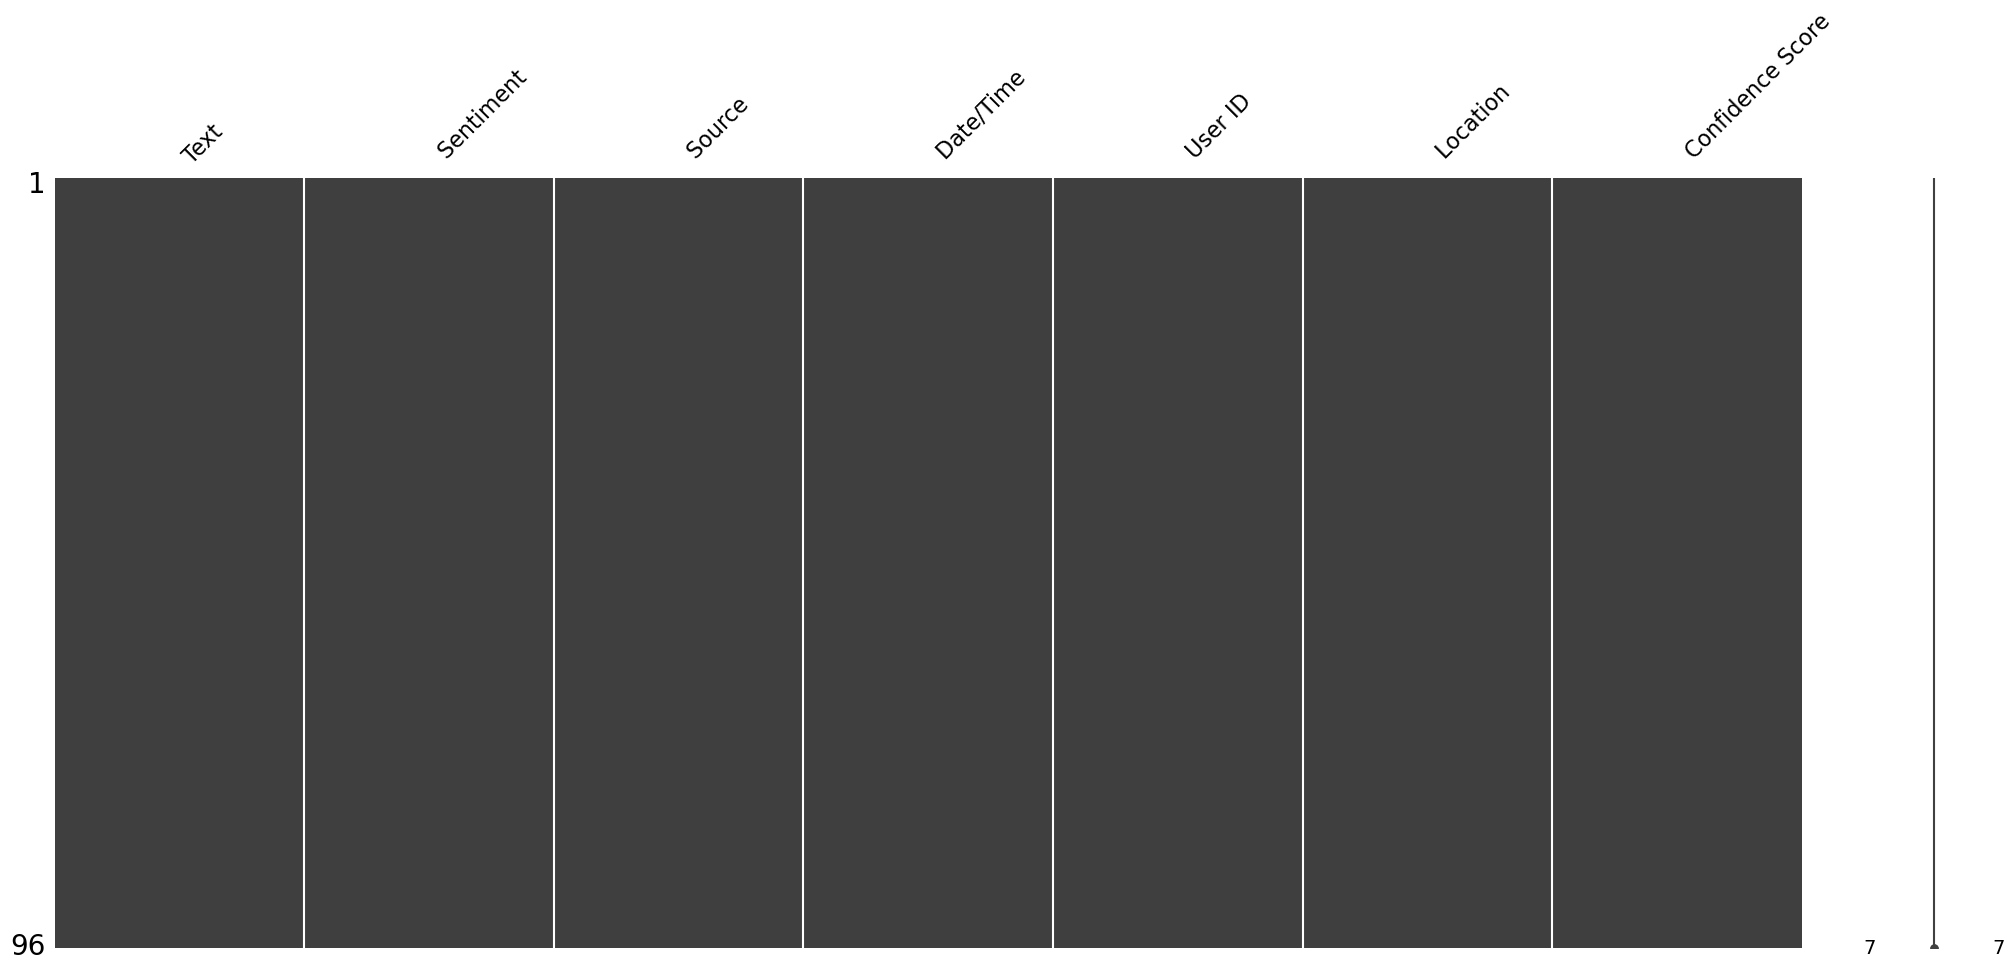

In [4]:
import missingno as msno
msno.matrix(customer)  # checking missing values

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


# Display the first few rows of the dataset
print(customer.head())

# Summary statistics
print(customer.describe())

                                               Text  Sentiment         Source  \
0                              I love this product!   Positive        Twitter   
1                         The service was terrible.   Negative   Yelp Reviews   
2                            This movie is amazing!   Positive           IMDb   
3  I'm so disappointed with their customer support.   Negative   Online Forum   
4                Just had the best meal of my life!   Positive    TripAdvisor   

              Date/Time       User ID      Location   Confidence Score  
0   2023-06-15 09:23:14      @user123      New York               0.85  
1   2023-06-15 11:45:32       user456   Los Angeles               0.65  
2   2023-06-15 14:10:22   moviefan789        London               0.92  
3   2023-06-15 17:35:11    forumuser1       Toronto               0.78  
4   2023-06-16 08:50:59      foodie22         Paris               0.88  
        Confidence Score
count          96.000000
mean            0.791771


In [6]:
customer

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,I love this product!,Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,The service was terrible.,Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,This movie is amazing!,Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,I'm so disappointed with their customer support.,Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,Just had the best meal of my life!,Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88
...,...,...,...,...,...,...,...
91,Just had the most amazing vacation! I can't wa...,Positive,TripAdvisor,2023-07-02 18:01:23,travelenthusiast1,Sydney,0.93
92,The food at this restaurant was awful. Never g...,Negative,Zomato,2023-07-02 20:45:37,foodlover123,Mumbai,0.55
93,I can't stop listening to this song. It's my n...,Positive,Spotify,2023-07-03 09:17:52,musiclover789,Berlin,0.91
94,Their website is so confusing and poorly desig...,Negative,Website Review,2023-07-03 11:59:18,user789,Toronto,0.68


Index(['Text', ' Sentiment', ' Source', ' Date/Time', ' User ID', ' Location',
       ' Confidence Score'],
      dtype='object')
Index(['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location',
       'Confidence Score'],
      dtype='object')


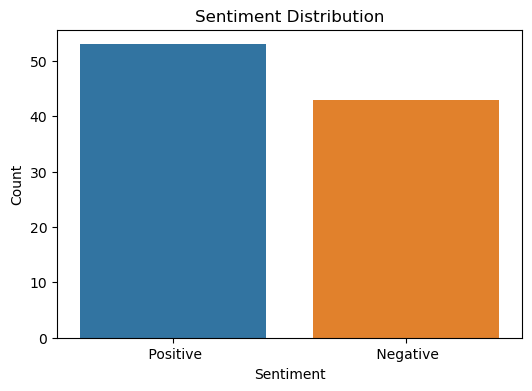

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
customer = pd.read_csv("/kaggle/input/cleaned/sentiment-analysis.csv")

# Check the column names for any whitespace or special characters
print(customer.columns)

# Remove leading and trailing whitespaces from column names
customer.columns = customer.columns.str.strip()

# Check the column names again to ensure they are clean
print(customer.columns)

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=customer)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the dataset
customer = pd.read_csv("/kaggle/input/cleaned/sentiment-analysis.csv")

# Check the column names for any whitespace or special characters
print(customer.columns)

# Remove leading and trailing whitespaces from column names
customer.columns = customer.columns.str.strip()

# Check the column names again to ensure they are clean
print(customer.columns)

# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment polarity from the text
def get_sentiment_polarity(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the "Text" column and add it as a new column
customer['Sentiment_Analysis'] = customer['Text'].apply(get_sentiment_polarity)

# Count the number of positive and negative sentiments
sentiment_counts = customer['Sentiment'].value_counts()
print(sentiment_counts)



Index(['Text', ' Sentiment', ' Source', ' Date/Time', ' User ID', ' Location',
       ' Confidence Score'],
      dtype='object')
Index(['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location',
       'Confidence Score'],
      dtype='object')
 Positive    53
 Negative    43
Name: Sentiment, dtype: int64


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Positive    50
Negative    36
Neutral     10
Name: Sentiment_Analysis, dtype: int64


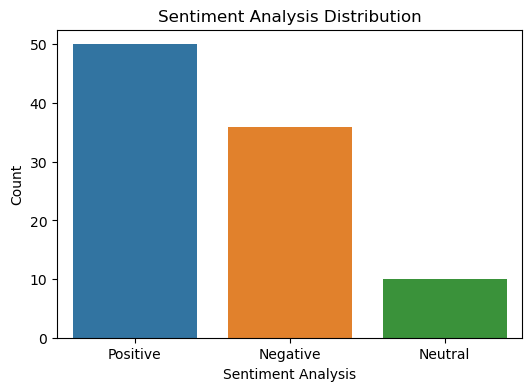

In [9]:
# Count the number of positive, negative, and neutral sentiments from sentiment analysis
sentiment_analysis_counts = customer['Sentiment_Analysis'].value_counts()
print(sentiment_analysis_counts)

# Plot sentiment analysis distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment_Analysis', data=customer)
plt.title("Sentiment Analysis Distribution")
plt.xlabel("Sentiment Analysis")
plt.ylabel("Count")
plt.show()




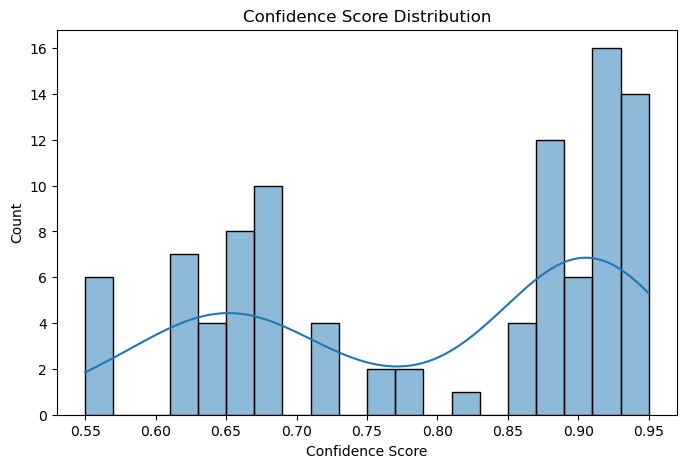

In [10]:
# Check the distribution of confidence scores
plt.figure(figsize=(8, 5))
sns.histplot(data=customer, x='Confidence Score', bins=20, kde=True)
plt.title("Confidence Score Distribution")
plt.xlabel("Confidence Score")
plt.ylabel("Count")
plt.show()



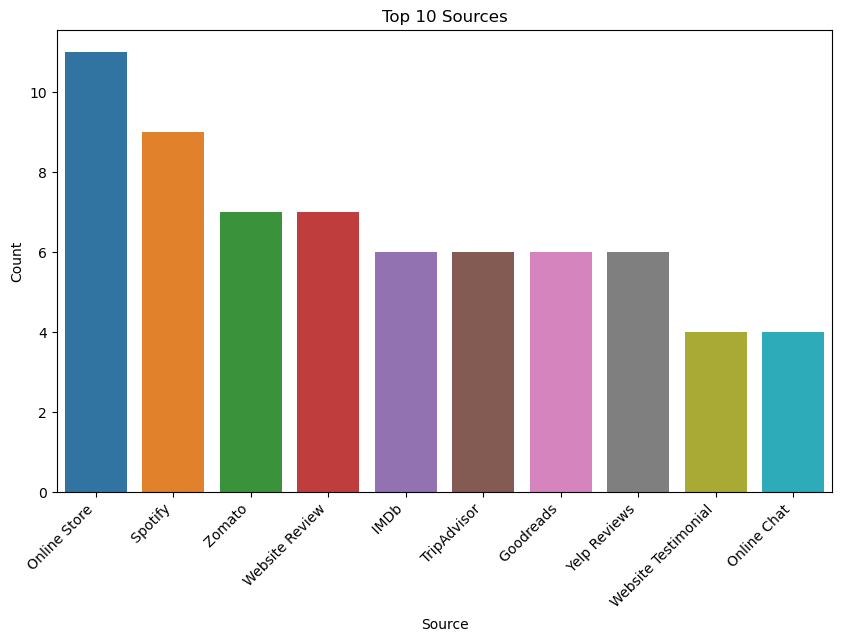

In [11]:
# Top 10 sources contributing to the dataset
top_sources = customer['Source'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sources.index, y=top_sources.values)
plt.title("Top 10 Sources")
plt.xlabel("Source")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()



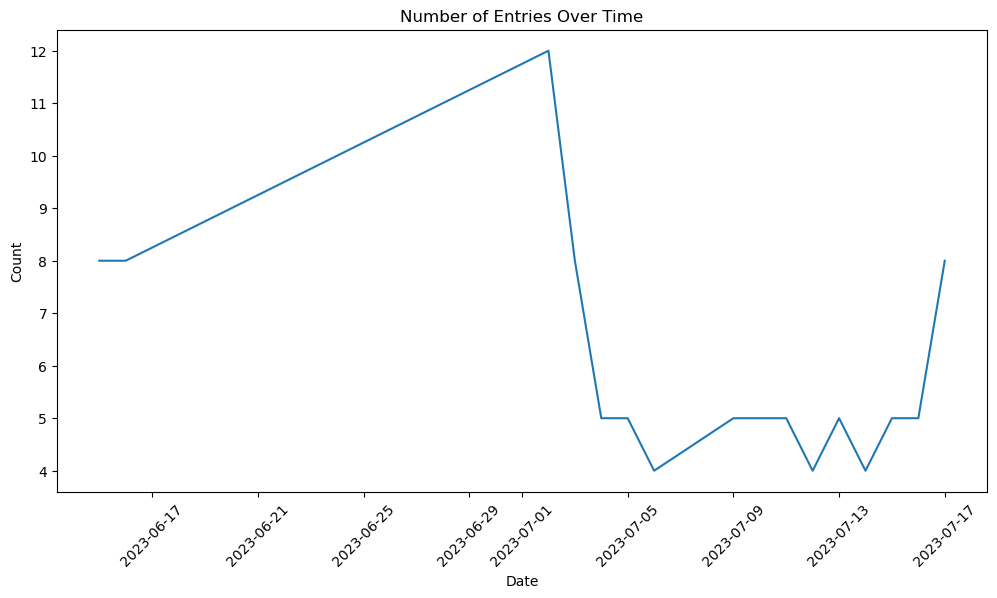

In [12]:
# Time-based analysis
customer['Date/Time'] = pd.to_datetime(customer['Date/Time'])
customer['Date'] = customer['Date/Time'].dt.date
time_counts = customer['Date'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=time_counts.index, y=time_counts.values)
plt.title("Number of Entries Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from wordcloud import WordCloud

# Load the dataset
customer = pd.read_csv("/kaggle/input/cleaned/sentiment-analysis.csv")

# Preprocess the text data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r"[^a-zA-Z]", " ", text)
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    # Stem words
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    # Join the words back into text
    text = " ".join(words)
    return text

# Apply text preprocessing to the "Text" column
customer["Cleaned_Text"] = customer["Text"].apply(preprocess_text)

# Display the first few rows of the preprocessed text
print(customer[["Text", "Cleaned_Text"]].head())


                                               Text               Cleaned_Text
0                              I love this product!               love product
1                         The service was terrible.             servic terribl
2                            This movie is amazing!                  movi amaz
3  I'm so disappointed with their customer support.  disappoint custom support
4                Just had the best meal of my life!             best meal life


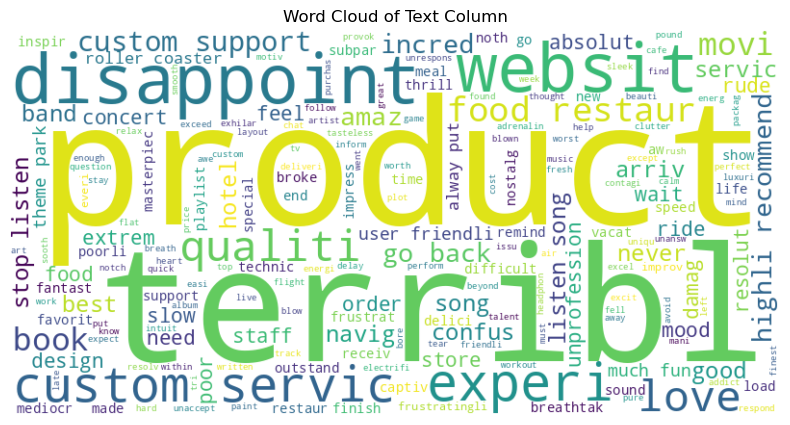

In [14]:
# Create a Word Cloud
all_text = " ".join(text for text in customer["Cleaned_Text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Text Column")
plt.show()


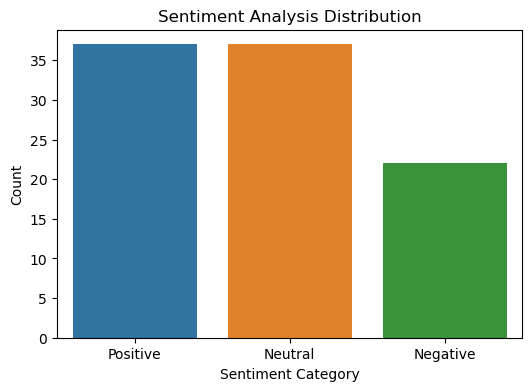

In [15]:
# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment polarity score
def get_sentiment_score(text):
    score = analyzer.polarity_scores(text)
    return score["compound"]

# Apply sentiment analysis to the "Text" column and add sentiment scores as a new column
customer["Sentiment_Score"] = customer["Cleaned_Text"].apply(get_sentiment_score)

# Categorize sentiment based on the sentiment score
def get_sentiment_category(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply the sentiment category function to create a new column
customer["Sentiment_Category"] = customer["Sentiment_Score"].apply(get_sentiment_category)

# Plot sentiment analysis distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment_Category', data=customer)
plt.title("Sentiment Analysis Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()


# **Named Entity Recognition (NER) Visualization:**

In [16]:
import spacy
from spacy import displacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to perform NER and visualize entities
def visualize_ner(text):
    doc = nlp(text)
    displacy.render(doc, style="ent", jupyter=True)

# Visualize NER for a sample text (replace with your own text)
sample_text = customer['Text'].iloc[0]
visualize_ner(sample_text)


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# **Text Similarity**

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample query text (replace with your own text)
query_text = "This product is amazing!"

# Create a TF-IDF vectorizer and fit-transform the texts
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(customer['Text'])

# Calculate cosine similarity between the query and all texts
query_vector = tfidf_vectorizer.transform([query_text])
cosine_similarities = cosine_similarity(query_vector, tfidf_matrix)

# Get the most similar text's index and text itself
most_similar_idx = cosine_similarities.argmax()
most_similar_text = customer['Text'].iloc[most_similar_idx]

print("Query Text: ", query_text)
print("Most Similar Text: ", most_similar_text)


Query Text:  This product is amazing!
Most Similar Text:  This movie is amazing!
